In [159]:
from sklearn.datasets import make_classification
import numpy as np
from pydantic import BaseModel, Field

X, y = make_classification(n_samples=1000, n_features=20)

In [160]:
class LogisticRegression(BaseModel, arbitrary_types_allowed=True):
    x: np.ndarray = Field(description="Independent Features")
    y: np.ndarray = Field(description="Dependent Feature")

    def sigmoid(self, z: np.ndarray):
        return 1 / (1 + np.exp(-z))

    def compute_gradient(self, X, y, theta):
        m = len(y)
        predictions = self.sigmoid(np.dot(X, theta))
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        return gradient

    def gradient_descent(self, X, y, learning_rate, iterations):
        theta = np.zeros((X.shape[1], 1))
        for _ in range(iterations):
            gradient = self.compute_gradient(X, y, theta)
            theta -= learning_rate * gradient
        return theta


# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20)

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Reshape y to be a column vector
y = y.reshape(-1, 1)

# Initialize and train the model
model = LogisticRegression(x=X, y=y)
theta = model.gradient_descent(X, y, learning_rate=0.01, iterations=1000)

In [161]:
predictions = 1 / (1 + np.exp(-np.dot(theta.T, X.T)))

In [162]:
predictions = np.where(predictions < 0.5, 0, 1)

In [163]:
loss = predictions.ravel() - y.ravel()

In [164]:
np.count_nonzero(loss == -1)

73

In [165]:
accuracy = (len(loss) - np.count_nonzero(loss == -1)) / len(loss)

In [13]:
# accuracy * 100
# %pip install ipywidgets

In [14]:
# %matplotlib widget

In [15]:
# %pip install ipywidgets
%matplotlib inline

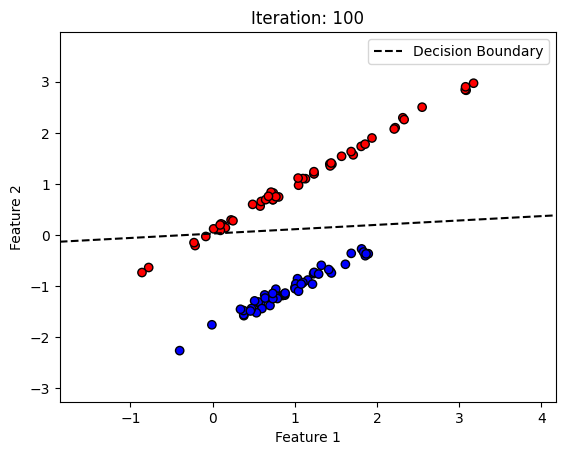

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
from scipy.special import expit  # sigmoid

# Generate simple 2D classification dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
)

# Add bias term to X
X_b = np.hstack([np.ones((X.shape[0], 1)), X])  # shape: (100, 3)

# Initialize weights (including bias)
w = np.random.randn(3)


# Sigmoid function
def sigmoid(z):
    return expit(z)


# Prediction
def predict(X, w):
    return sigmoid(X @ w)


# Decision boundary function
def get_boundary_line(w, x_range):
    # w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1)/w2
    return -(w[0] + w[1] * x_range) / w[2]


# Set up plot
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
(line,) = ax.plot([], [], "k--", label="Decision Boundary")
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_title("Logistic Regression Boundary Update")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()

# Gradient descent parameters
learning_rate = 0.1
iterations = 100
weight_history = []

# Training loop to collect weight history
w_current = w.copy()
for _ in range(iterations):
    y_pred = predict(X_b, w_current)
    gradient = X_b.T @ (y_pred - y) / X.shape[0]
    w_current -= learning_rate * gradient
    weight_history.append(w_current.copy())


# Animation function
def animate(i):
    w = weight_history[i]
    x_vals = np.array(ax.get_xlim())
    y_vals = get_boundary_line(w, x_vals)
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Iteration: {i+1}")
    return (line,)


# Create animation
ani = FuncAnimation(fig, animate, frames=iterations, interval=100, blit=True)
ani.save("decision_boundary.gif", writer="pillow", fps=10)

# plt.show()

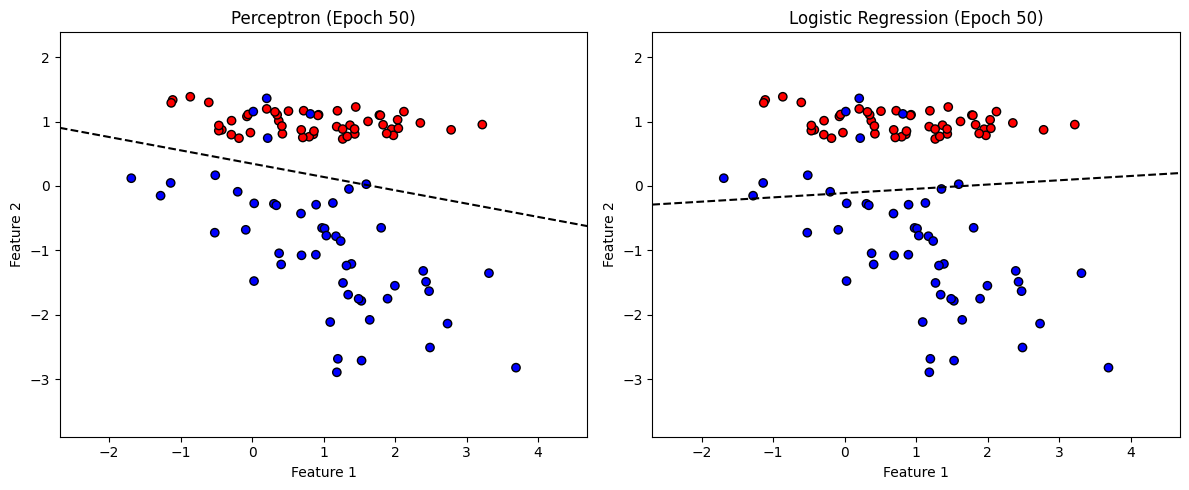

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification
from scipy.special import expit  # sigmoid

# Create simple 2D binary classification dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=0,
)

# Add bias term for logistic regression
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize weights
w_perceptron = np.random.randn(3)
w_logistic = np.random.randn(3)

# Storage for animation
history_perceptron = []
history_logistic = []

# Training parameters
learning_rate = 0.1
epochs = 50


# Sigmoid function
def sigmoid(z):
    return expit(z)


# Collect weight updates for both models
for _ in range(epochs):
    # Logistic regression update
    y_pred_log = sigmoid(X_b @ w_logistic)
    grad = X_b.T @ (y_pred_log - y) / len(y)
    w_logistic -= learning_rate * grad
    history_logistic.append(w_logistic.copy())

    # Perceptron update (uses hard threshold)
    for xi, yi in zip(X_b, y):
        pred = 1 if np.dot(w_perceptron, xi) > 0 else 0
        if pred != yi:
            w_perceptron += learning_rate * (yi - pred) * xi
    history_perceptron.append(w_perceptron.copy())


# Function to get decision boundary line
def decision_line(w, x_range):
    return -(w[0] + w[1] * x_range) / w[2]


# Set up plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")

(line1,) = ax1.plot([], [], "k--")
(line2,) = ax2.plot([], [], "k--")
ax1.set_title("Perceptron")
ax2.set_title("Logistic Regression")

for ax in (ax1, ax2):
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")


# Animation function
def animate(i):
    w1 = history_perceptron[i]
    w2 = history_logistic[i]
    x_vals = np.array(ax1.get_xlim())

    line1.set_data(x_vals, decision_line(w1, x_vals))
    line2.set_data(x_vals, decision_line(w2, x_vals))

    ax1.set_title(f"Perceptron (Epoch {i+1})")
    ax2.set_title(f"Logistic Regression (Epoch {i+1})")
    return line1, line2


ani = FuncAnimation(fig, animate, frames=epochs, interval=200, blit=True)
ani.save("decision_boundary.gif", writer="pillow", fps=5)
plt.tight_layout()
plt.show()